In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
data = pd.read_csv("results.csv")
data.head(8)

,Dataset,model,attack,acc,drop_ratio
0,Cora,GCN,clean,0.7084,0.0000
1,Cora,GCN,random,0.6930,0.0217
2,Cora,GCN,GRBCD,0.5166,0.2708
3,Cora,GCN,PRBCD,0.6045,0.1467
4,CiteSeer,GCN,clean,0.9333,0.0000
5,CiteSeer,GCN,random,0.9108,0.0241
6,CiteSeer,GCN,GRBCD,0.8983,0.0375
7,CiteSeer,GCN,PRBCD,0.8174,0.1242


In [3]:
data['keep_ratio'] = 1 - data['drop_ratio']
data.head(8)

,Dataset,model,attack,acc,drop_ratio,keep_ratio
0,Cora,GCN,clean,0.7084,0.0000,1.0000
1,Cora,GCN,random,0.6930,0.0217,0.9783
2,Cora,GCN,GRBCD,0.5166,0.2708,0.7292
3,Cora,GCN,PRBCD,0.6045,0.1467,0.8533
4,CiteSeer,GCN,clean,0.9333,0.0000,1.0000
5,CiteSeer,GCN,random,0.9108,0.0241,0.9759
6,CiteSeer,GCN,GRBCD,0.8983,0.0375,0.9625
7,CiteSeer,GCN,PRBCD,0.8174,0.1242,0.8758


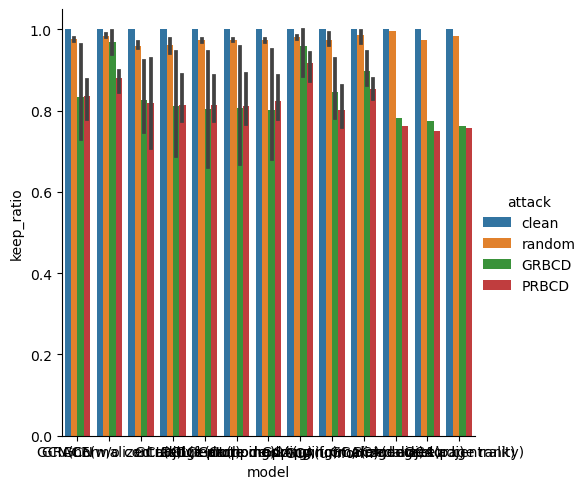

In [18]:
sns.catplot(data=data, x="model", y="keep_ratio", hue="attack", kind="bar")

In [ ]:
# (
#     so.Plot(data, x="model", y="keep_ratio", color="attack")
#     .add(so.Bar(), so.Agg())
# )

In [ ]:
# sns.catplot(data=data[data['attack']=='GRBCD'], x="model", y="keep_ratio", hue="attack", kind="point")

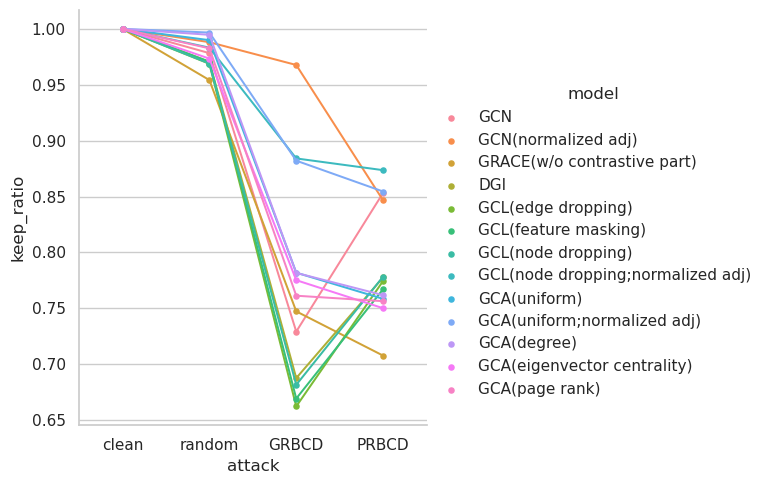

In [6]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
sns.catplot(data=data, x="attack", y="keep_ratio", hue="model", kind="point")

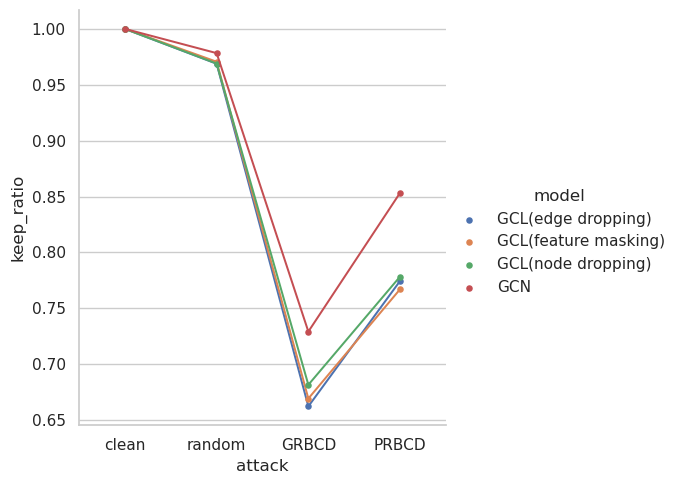

In [66]:
obs1 = data[data['model'].isin(['GCN','GCL(edge dropping)','GCL(feature masking)','GCL(node dropping)'])]
sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point")

In [13]:
obs1 = data[data['model'].str.contains('GCL')]
obs1 = obs1[~data['model'].str.contains('adj')]
obs1 = obs1[data['Dataset'].str.contains('Cora')]
obs1

/tmp/ipykernel_1751019/3301376520.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs1 = obs1[~data['model'].str.contains('adj')]
/tmp/ipykernel_1751019/3301376520.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs1 = obs1[data['Dataset'].str.contains('Cora')]


,Dataset,model,attack,acc,drop_ratio,keep_ratio
48,Cora,GCL(edge dropping),clean,0.6378,0.0000,1.0000
49,Cora,GCL(edge dropping),random,0.6179,0.0312,0.9688
50,Cora,GCL(edge dropping),GRBCD,0.4224,0.3377,0.6623
51,Cora,GCL(edge dropping),PRBCD,0.4940,0.2255,0.7745
60,Cora,GCL(feature masking),clean,0.6350,0.0000,1.0000
61,Cora,GCL(feature masking),random,0.6163,0.0294,0.9706
62,Cora,GCL(feature masking),GRBCD,0.4250,0.3307,0.6693
63,Cora,GCL(feature masking),PRBCD,0.4871,0.2329,0.7671
72,Cora,GCL(node dropping),clean,0.6345,0.0000,1.0000
73,Cora,GCL(node dropping),random,0.6148,0.0310,0.9690


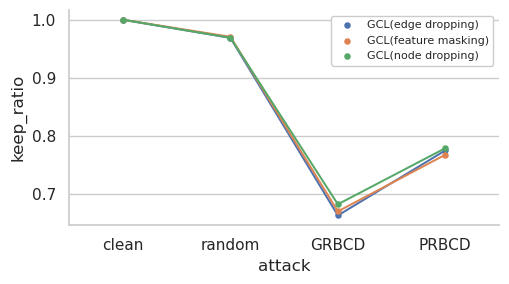

In [20]:
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)

# 获取当前的图表对象
ax = g.ax

# 移动图例到右上角空白处
legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
frame = legend.get_frame()
frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize=5)
plt.show()

# 设置保存的文件路径和名称
output_file = "obs1.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=800, bbox_inches='tight')

In [21]:
obs11 = data[data['model'].str.contains('GCA')]
obs11 = obs11[~data['model'].str.contains('adj')]
obs11 = obs11[data['Dataset'].str.contains('Cora')]
obs11

/tmp/ipykernel_1751019/305437174.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs11 = obs11[~data['model'].str.contains('adj')]
/tmp/ipykernel_1751019/305437174.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obs11 = obs11[data['Dataset'].str.contains('Cora')]


,Dataset,model,attack,acc,drop_ratio,keep_ratio
96,Cora,GCA(uniform),clean,0.5872,0.0000,1.0000
97,Cora,GCA(uniform),random,0.5771,0.0101,0.9899
98,Cora,GCA(uniform),GRBCD,0.3691,0.2181,0.7819
99,Cora,GCA(uniform),PRBCD,0.3457,0.2415,0.7585
120,Cora,GCA(degree),clean,0.5912,0.0000,1.0000
121,Cora,GCA(degree),random,0.5859,0.0053,0.9947
122,Cora,GCA(degree),GRBCD,0.3729,0.2183,0.7817
123,Cora,GCA(degree),PRBCD,0.3530,0.2382,0.7618
124,Cora,GCA(eigenvector centrality),clean,0.5969,0.0000,1.0000
125,Cora,GCA(eigenvector centrality),random,0.5703,0.0266,0.9734


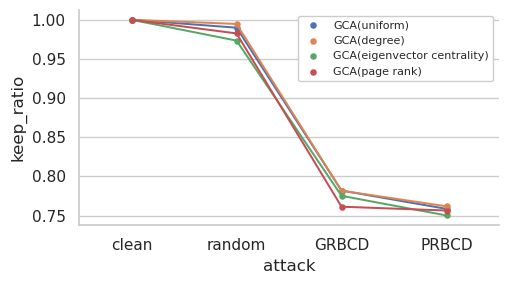

In [23]:
g = sns.catplot(data=obs11, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)

# 获取当前的图表对象
ax = g.ax

# 移动图例到右上角空白处
# ax.legend(loc='upper right')
legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
frame = legend.get_frame()
frame.set_linewidth(1)  # 设置图例框的线宽
# frame.set_edgecolor('red')  # 设置图例框的边框颜色

# 显示图表
plt.show()

# 设置保存的文件路径和名称
output_file = "obs11.png"

# 保存图表为高清格式
# g.figure.suptitle("GCA with augmentations", fontsize=18)
g.figure.savefig(output_file, dpi=800, bbox_inches='tight')

In [24]:
obs2 = data[data['model'].isin(['GCN','DGI','GCL(edge dropping)'])]
# obs2 = obs2[~data['model'].str.contains('adj')]
obs2

,Dataset,model,attack,acc,drop_ratio,keep_ratio
0,Cora,GCN,clean,0.7084,0.0000,1.0000
1,Cora,GCN,random,0.6930,0.0217,0.9783
2,Cora,GCN,GRBCD,0.5166,0.2708,0.7292
3,Cora,GCN,PRBCD,0.6045,0.1467,0.8533
4,CiteSeer,GCN,clean,0.9333,0.0000,1.0000
5,CiteSeer,GCN,random,0.9108,0.0241,0.9759
6,CiteSeer,GCN,GRBCD,0.8983,0.0375,0.9625
7,CiteSeer,GCN,PRBCD,0.8174,0.1242,0.8758
8,PubMed,GCN,clean,0.8790,0.0000,1.0000
9,PubMed,GCN,random,0.8543,0.0281,0.9719


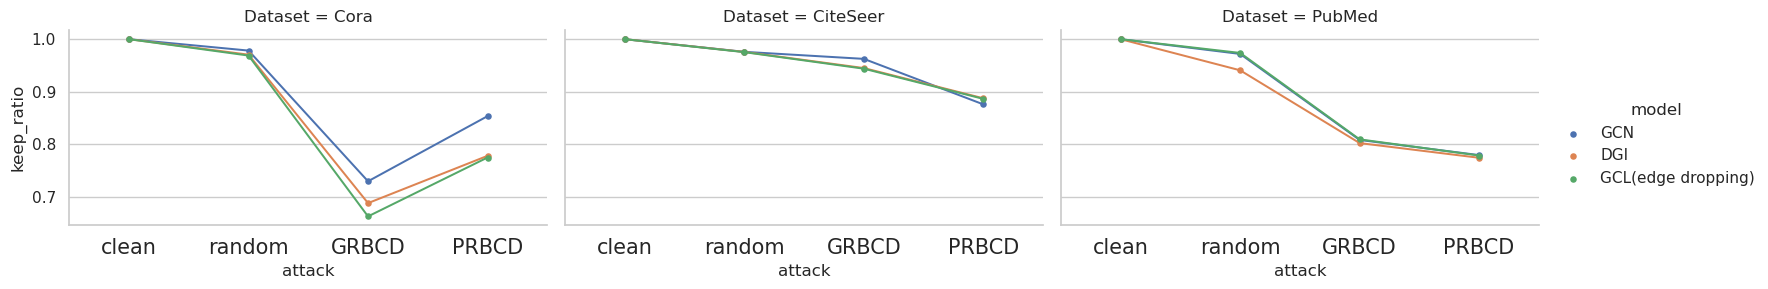

In [26]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
g = sns.catplot(data=obs2, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)

# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.show()

# 设置保存的文件路径和名称
output_file = "obs2.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=800, bbox_inches='tight')

In [27]:
obs22 = data[data['model'].isin(['GRACE(w/o contrastive part)','GCA(uniform)'])]
# obs2 = obs2[~data['model'].str.contains('adj')]
obs22

,Dataset,model,attack,acc,drop_ratio,keep_ratio
24,Cora,GRACE(w/o contrastive part),clean,0.6634,0.0000,1.0000
25,Cora,GRACE(w/o contrastive part),random,0.6176,0.0458,0.9542
26,Cora,GRACE(w/o contrastive part),GRBCD,0.4107,0.2527,0.7473
27,Cora,GRACE(w/o contrastive part),PRBCD,0.3711,0.2923,0.7077
28,CiteSeer,GRACE(w/o contrastive part),clean,0.9579,0.0000,1.0000
29,CiteSeer,GRACE(w/o contrastive part),random,0.9267,0.0312,0.9688
30,CiteSeer,GRACE(w/o contrastive part),GRBCD,0.8807,0.0772,0.9228
31,CiteSeer,GRACE(w/o contrastive part),PRBCD,0.8846,0.0733,0.9267
32,PubMed,GRACE(w/o contrastive part),clean,0.8831,0.0000,1.0000
33,PubMed,GRACE(w/o contrastive part),random,0.8397,0.0434,0.9566


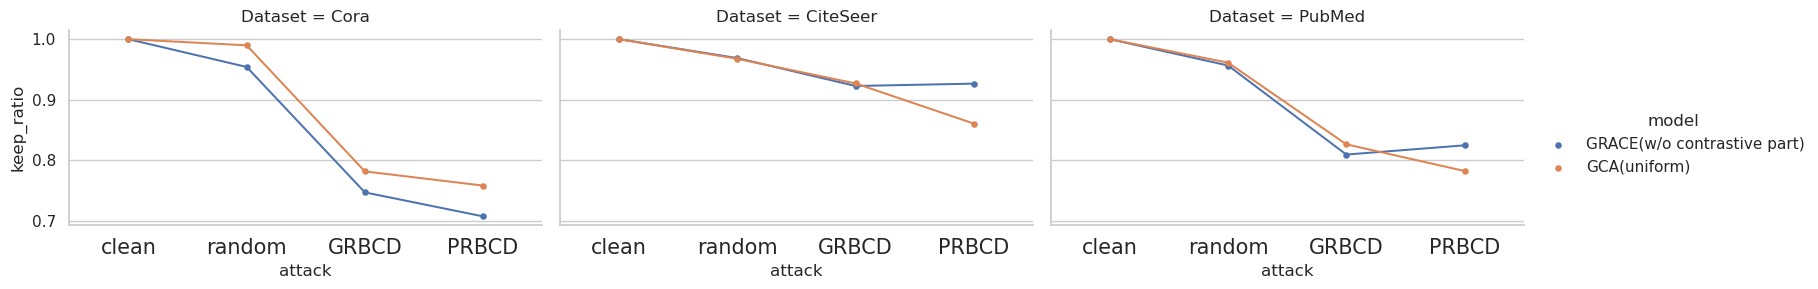

In [28]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
g = sns.catplot(data=obs22, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)

# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.show()

# 设置保存的文件路径和名称
output_file = "obs22.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=800, bbox_inches='tight')

In [48]:
obs3 = data[data['model'].isin(['GCN','GCN(normalized adj)'])]
# obs2 = obs2[~data['model'].str.contains('adj')]
# obs3 = obs3[data['Dataset'].str.contains('Cora')]
obs3

,Dataset,model,attack,acc,drop_ratio,keep_ratio
0,Cora,GCN,clean,0.7084,0.0000,1.0000
1,Cora,GCN,random,0.6930,0.0217,0.9783
2,Cora,GCN,GRBCD,0.5166,0.2708,0.7292
3,Cora,GCN,PRBCD,0.6045,0.1467,0.8533
4,CiteSeer,GCN,clean,0.9333,0.0000,1.0000
5,CiteSeer,GCN,random,0.9108,0.0241,0.9759
6,CiteSeer,GCN,GRBCD,0.8983,0.0375,0.9625
7,CiteSeer,GCN,PRBCD,0.8174,0.1242,0.8758
8,PubMed,GCN,clean,0.8790,0.0000,1.0000
9,PubMed,GCN,random,0.8543,0.0281,0.9719


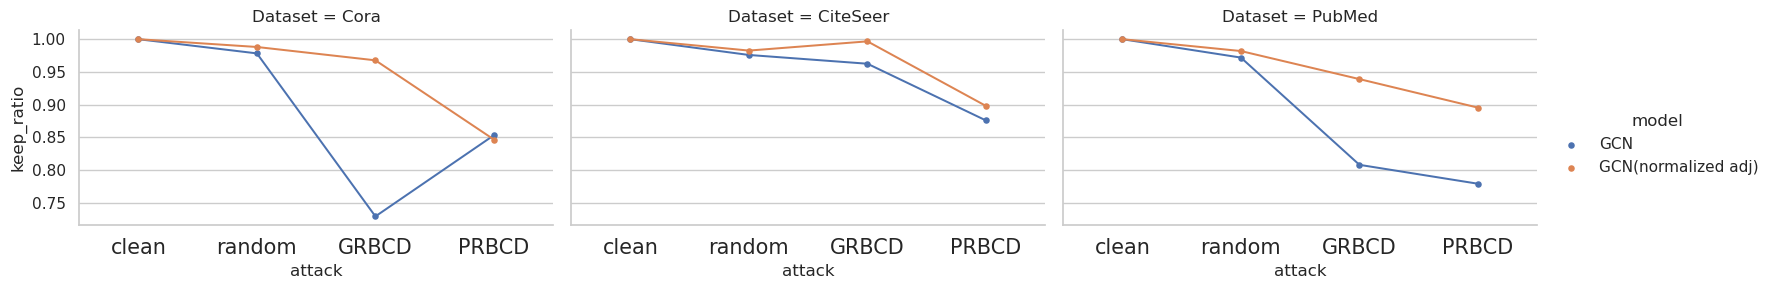

In [49]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
g = sns.catplot(data=obs3, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)

# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.show()

# 设置保存的文件路径和名称
output_file = "obs3.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=800, bbox_inches='tight')

In [50]:
# obs32 = data[data['model'].isin(['GCN','GCL(node dropping)','GCN(normalized adj)','GCL(node dropping;normalized adj)', 'GCA(uniform)', 'GCA(uniform;normalized adj)'])]
obs32 = data[data['model'].isin(['GCL(node dropping)','GCL(node dropping;normalized adj)'])]
obs32

,Dataset,model,attack,acc,drop_ratio,keep_ratio
72,Cora,GCL(node dropping),clean,0.6345,0.0000,1.0000
73,Cora,GCL(node dropping),random,0.6148,0.0310,0.9690
74,Cora,GCL(node dropping),GRBCD,0.4325,0.3184,0.6816
75,Cora,GCL(node dropping),PRBCD,0.4939,0.2216,0.7784
76,CiteSeer,GCL(node dropping),clean,0.8815,0.0000,1.0000
77,CiteSeer,GCL(node dropping),random,0.8599,0.0245,0.9755
78,CiteSeer,GCL(node dropping),GRBCD,0.8355,0.0521,0.9479
79,CiteSeer,GCL(node dropping),PRBCD,0.7809,0.1142,0.8858
80,PubMed,GCL(node dropping),clean,0.8752,0.0000,1.0000
81,PubMed,GCL(node dropping),random,0.8523,0.0261,0.9739


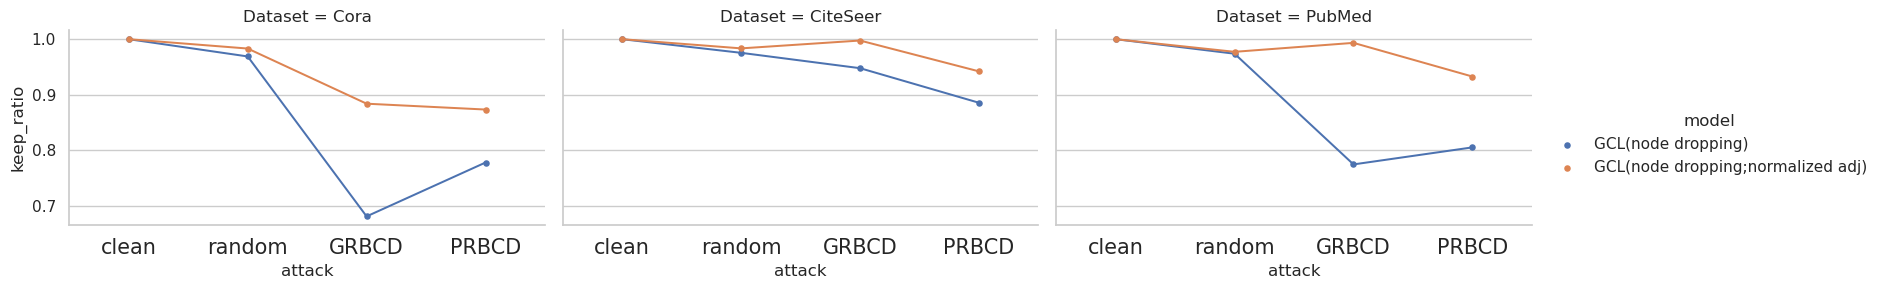

In [51]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
g = sns.catplot(data=obs32, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)

# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.show()

# 设置保存的文件路径和名称
output_file = "obs32.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=800, bbox_inches='tight')

In [52]:
# obs33 = data[data['model'].isin(['GCN','GCL(node dropping)','GCN(normalized adj)','GCL(node dropping;normalized adj)', 'GCA(uniform)', 'GCA(uniform;normalized adj)'])]
obs33 = data[data['model'].isin(['GCA(uniform)','GCA(uniform;normalized adj)'])]
obs33

,Dataset,model,attack,acc,drop_ratio,keep_ratio
96,Cora,GCA(uniform),clean,0.5872,0.0000,1.0000
97,Cora,GCA(uniform),random,0.5771,0.0101,0.9899
98,Cora,GCA(uniform),GRBCD,0.3691,0.2181,0.7819
99,Cora,GCA(uniform),PRBCD,0.3457,0.2415,0.7585
100,CiteSeer,GCA(uniform),clean,0.8632,0.0000,1.0000
101,CiteSeer,GCA(uniform),random,0.8308,0.0324,0.9676
102,CiteSeer,GCA(uniform),GRBCD,0.7902,0.0730,0.9270
103,CiteSeer,GCA(uniform),PRBCD,0.7240,0.1392,0.8608
104,PubMed,GCA(uniform),clean,0.8575,0.0000,1.0000
105,PubMed,GCA(uniform),random,0.8188,0.0387,0.9613


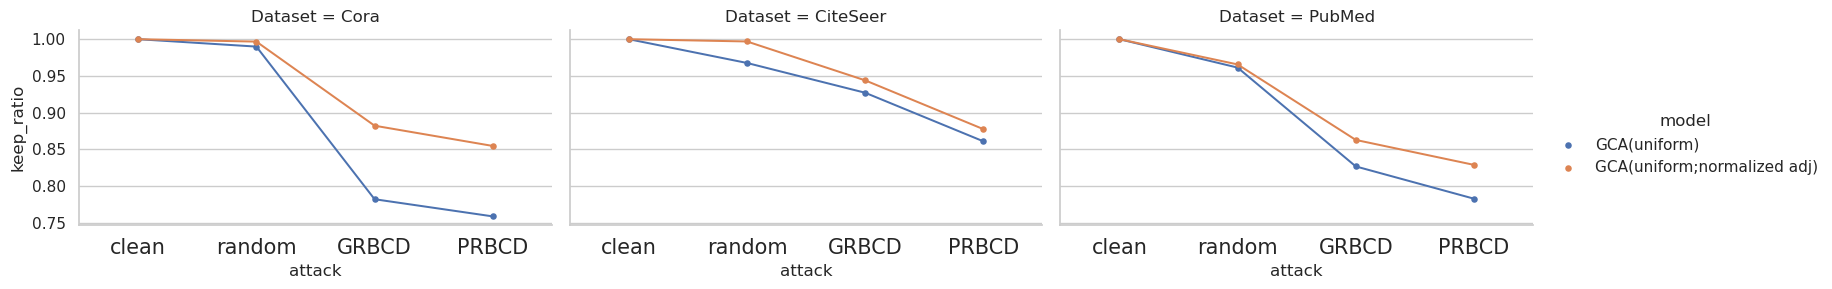

In [53]:
sns.set(style="whitegrid", rc={'lines.linewidth': 0.8})
# g = sns.catplot(data=obs1, x="attack", y="keep_ratio", hue="model", kind="point", height=3, aspect=1.75, legend=False)
g = sns.catplot(data=obs33, x="attack", y="keep_ratio", hue="model", kind="point", col='Dataset', height=3, aspect=1.75, legend=True)

# 获取当前的图表对象
# ax = g.ax

# 移动图例到右上角空白处
# legend = ax.legend(frameon=True, framealpha=1.0, prop={'size': 8}, loc='upper right')
# frame = legend.get_frame()
# frame.set_linewidth(1)  # 设置图例框的线宽

# 显示图表
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.show()

# 设置保存的文件路径和名称
output_file = "obs33.png"

# 保存图表为高清格式
# g.figure.suptitle("GCL with augmentations", fontsize=12)
g.figure.savefig(output_file, dpi=800, bbox_inches='tight')